In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

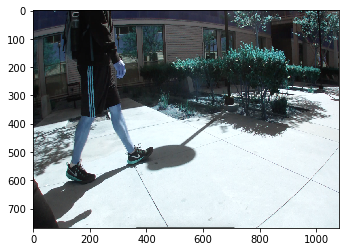

In [3]:
foot = cv2.imread('danny_foot.png')


resized_foot = cv2.resize(foot, (1080, 768))
plt.imshow(resized_foot)
plt.show()

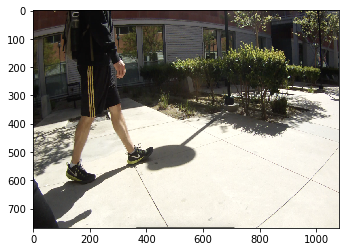

In [4]:
# convert to rgb from bgr
foot_rgb = cv2.cvtColor(resized_foot, cv2.COLOR_BGR2RGB)
plt.imshow(foot_rgb)
plt.show()

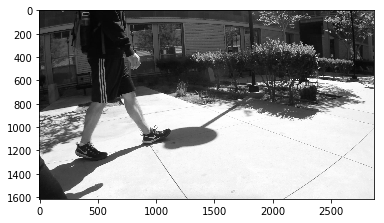

135.65370122813675

In [5]:
foot_grayscaled = cv2.cvtColor(foot, cv2.COLOR_BGR2GRAY)
plt.imshow(foot_grayscaled, cmap='gray')
plt.show()
foot_grayscaled.mean()

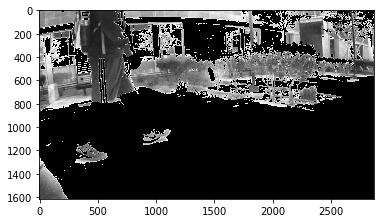

In [6]:
lower_black = np.array([0])
upper_black = np.array([64])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

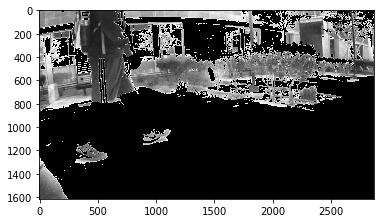

In [7]:
ret1, img1_thresh = cv2.threshold(pimg1, lower_black, upper_black, cv2.THRESH_TOZERO )
plt.imshow(img1_thresh, cmap='gray')
plt.show()

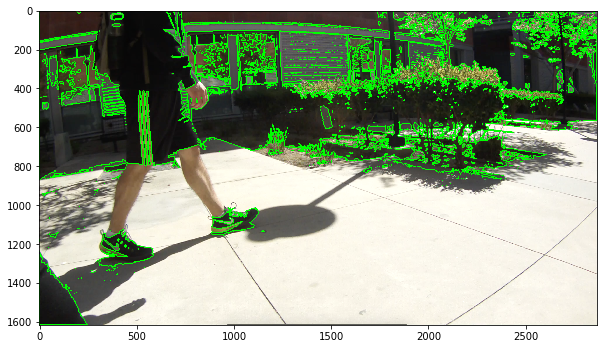

In [8]:
threshold_color = [0, 255, 0] # green

foot_copy = foot.copy()
foot_copy_copy = foot.copy()
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img1_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(foot_copy, img1_contours, -1, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(foot_copy, cv2.COLOR_BGR2RGB) )
plt.show()

In [9]:
len(img1_contours)

2625

In [10]:
def filter_boxes(img_rectangle_list, filter_size=0):
    filtered_boxes = []
    for rectangle in img_rectangle_list:
        if(rectangle[2] * rectangle[3] > filter_size):
            filtered_boxes.append(rectangle)
    return filtered_boxes

def draw_rectangles(img, img_rectangle_list, x_offset=0, y_offset=0):
    for x, y, w, h in img_rectangle_list:
        cv2.rectangle(
            img,
            (x - x_offset, y - y_offset),
            ( (x + x_offset) + w, (y + y_offset) + h),
            (0, 255, 0),
            2
        )
        
# def create_all_boxes(img_contours_list): # takes in a list of contour coordinates and returns an list of boxes around contours
#     box_list = []
#     for contour in img_contours_list:
#         cv2.boundingRect(contour)
#         box_list.append(contour)
#     return box_list

# def get_positive_roi(img, roi_list, x_offset=0, y_offset=0):
#     positive_roi = []
#     for x, y, w, h in roi_list:
#         roi = img[y:y + h, x:x + w, :3]
#         roi_resized = cv2.resize(roi, dimensions) # dimensions defined as (80, 80) above
#         features = hog.compute(roi_resized)
#         proba = svm_l.predict_proba(features.reshape(1, -1) )[0] # will produce meaningless results on very small datasets per docs
#         if proba[1] > .1:
#             positive_roi.append((x, y, w, h) )
#     return positive_roi

221


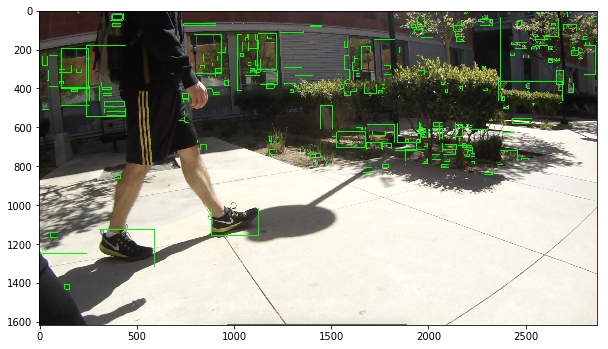

In [11]:
box_filter_size = 200
# dimensions = (1080,1080)
# this gets the rectangle, will show the x y coordinate then width and height
img1_all_boxes = [cv2.boundingRect(c) for c in img1_contours]
img1_filter_boxes = filter_boxes(img1_all_boxes, box_filter_size)
# draw_rectangles(foot_copy_copy, img1_filter_boxes, 5, 5)
print(len(img1_filter_boxes))
draw_rectangles(foot_copy_copy, img1_filter_boxes)
# roi_filtered_1 = get_positive_roi(foot, img1_filter_boxes)
# draw_rectangles(foot, roi_filtered_1, 5, 5)
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(foot_copy_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
print(img1_all_boxes[0])

(247, 1614, 2, 1)


In [13]:
# mask = np.zeros(foot_copy_copy.shape, dtype='uint8')
# for c in img1_contours:
#     (x, y, w, h) = cv2.boundingRect(c)
#     cv2.rectangle(mask, (x, y), (x+w, y+h), (255,255,255), -1)
# img = cv2.bitwise_and(foot_copy_copy, mask)
# plt.imshow(img)
# plt.show()

In [14]:
# lower_black = np.array([65])
# upper_black = np.array([129])
# pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
# plt.imshow(pimg1, cmap='gray')
# plt.show()

In [15]:
# lower_black = np.array([130])
# upper_black = np.array([194])
# pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
# plt.imshow(pimg1, cmap='gray')
# plt.show()

In [16]:
# lower_black = np.array([195])
# upper_black = np.array([255])
# pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
# plt.imshow(pimg1, cmap='gray')
# plt.show()

In [17]:
# # Load two images
# # img1 = cv2.imread('.jpg')
# # img2 = cv2.imread('opencv-logo.png')
# # I want to put logo on top-left corner, So I create a ROI
# img1 = resized_foot
# img2 = foot_rgb
# rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ]
# print("roi")
# plt.imshow(roi)
# plt.show()

# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [18]:
# # Now create a mask of logo and create its inverse mask also
# img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# print("img2gray")
# plt.imshow(img2gray, cmap='gray')
# plt.show()



In [19]:
# ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
# plt.imshow(mask, cmap='gray')
# plt.show()



In [20]:
# mask_inv = cv2.bitwise_not(mask)
# plt.imshow(mask_inv, cmap='gray')
# plt.show()



In [21]:
# # Now black-out the area of logo in ROI
# img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# plt.imshow(img1_bg)
# plt.show()



In [22]:
# # Take only region of logo from logo image.
# img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# plt.imshow(img2_fg)
# plt.show()



In [23]:
# # Put logo in ROI and modify the main image
# dst = cv2.add(img1_bg,img2_fg)
# img1[0:rows, 0:cols ] = dst
# # cv2.imshow('res',img1)
# plt.imshow(img1)
# plt.show()